==================================================================================================================

# Task 8: Clustering with K-Means - Mall Customer Segmentation dataset

==================================================================================================================

## Step 1: Install Required Libraries

In [1]:
!pip install seaborn

## Step 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files

## Step 3: Upload Dataset

In [3]:
uploaded = files.upload()
df = pd.read_csv("Mall_Customers.csv")

Saving Mall_Customers.csv to Mall_Customers.csv


## Step 4: Dataset Overview

In [4]:
print("Dataset Shape:", df.shape)
display(df.head())

Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 5: Data Cleaning & Feature Selection

In [5]:
# Drop customer IDs if present
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

In [6]:
# Example: We'll use only numerical features for clustering
features = df.select_dtypes(include=[np.number])
print("\nSelected Features for Clustering:\n", features.head())


Selected Features for Clustering:
    Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


## Step 6: Normalize Features

In [7]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Step 7: Elbow Method to find optimal K

In [8]:
inertia = []
K_range = range(1, 11)

In [9]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

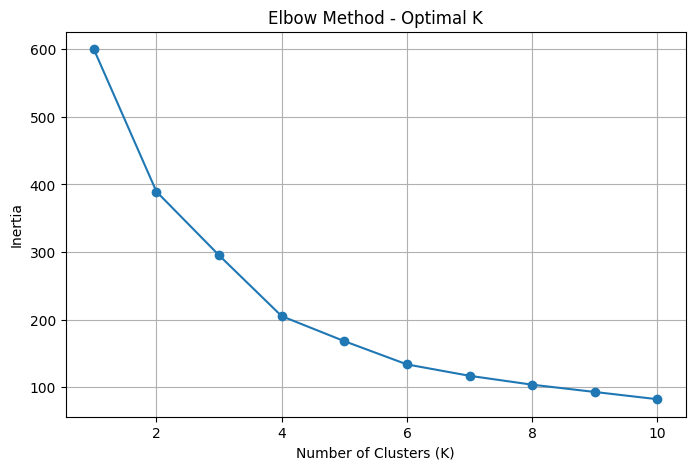

In [10]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## Step 8: Fit K-Means with chosen K (Example: K=5)

In [11]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(features_scaled)

In [12]:
df['Cluster'] = cluster_labels

In [13]:
print("\nCluster Counts:\n", df['Cluster'].value_counts())


Cluster Counts:
 Cluster
1    54
4    47
2    40
3    39
0    20
Name: count, dtype: int64


## Step 9: Evaluate Clustering with Silhouette Score

In [14]:
sil_score = silhouette_score(features_scaled, cluster_labels)
print(f"\nSilhouette Score for K={optimal_k}: {sil_score:.4f}")


Silhouette Score for K=5: 0.4166


## Step 10: Visualize Clusters

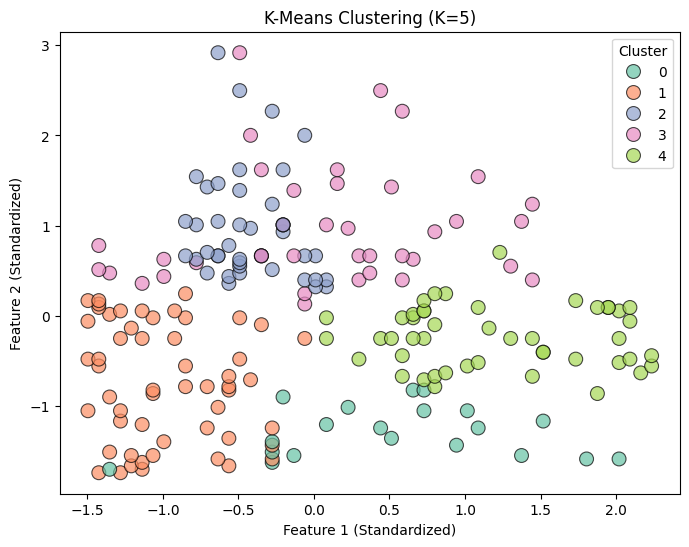

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1],
                hue=cluster_labels, palette="Set2", s=100, alpha=0.7, edgecolor="k")
plt.title(f"K-Means Clustering (K={optimal_k})")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.legend(title="Cluster")
plt.show()

## Step 11: PCA for better 2D visualization

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

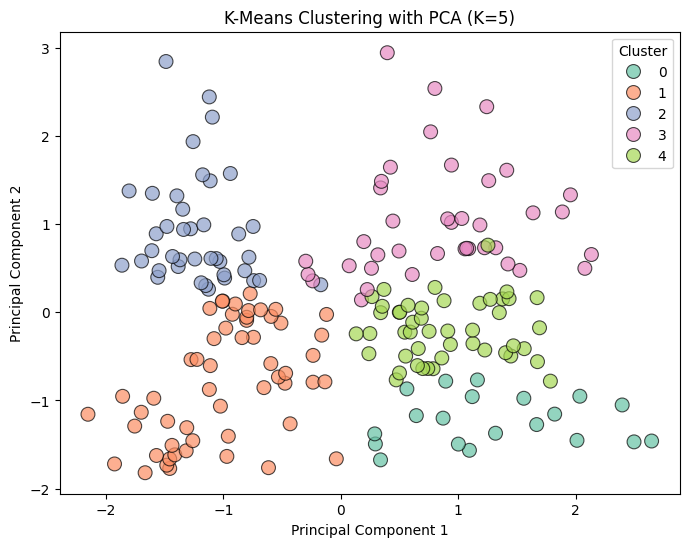

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1],
                hue=cluster_labels, palette="Set2", s=100, alpha=0.7, edgecolor="k")
plt.title(f"K-Means Clustering with PCA (K={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()